<a href="https://colab.research.google.com/github/firarru/Project-Tracer-Study/blob/main/Tracer_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOADING DATASET & EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('https://github.com/firarru/Project-Tracer-Study/raw/main/Dataset/Data%20Capstone.xlsx')
df

,Program Studi,Keterampilan yang dikuasai,Tingkat Keterampilan,Relevansi Keahlian dg Pekerjaan,Relevansi Etika dg Pekerjaan,Relevansi Kompetensi Bhs. Inggris dg Pekerjaan,Relevansi Kompetensi Komunikasi dg Pekerjaan,Relevansi Kemampuan Kerja Sama Tim dg Pekerjaan,Sektor Pekerjaan,Lama Tunggu Kerja,Relevansi Prodi dg Pekerjaan,Relevansi Kurikulum Prodi dg Pekerjaan,Relevansi Kurikulum Magang dg Pekerjaan,Relevansi Praktikum dg Pekerjaan
0,S1 Teknologi Informasi,UX/Design,Cukup Tinggi,Rendah,Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Pendidikan,14,Cukup Erat,Cukup Besar,Cukup Besar,Cukup Besar
1,S1 Teknik Industri,Career Management,Cukup Tinggi,Tinggi,Tinggi,Cukup Tinggi,Tinggi,Tinggi,Pendidikan,-1,Cukup Erat,Cukup Besar,Besar,Besar
2,S1 Rekayasa Perangkat Lunak,Phyton (Programming Language),Tinggi,Sangat Tinggi,Sangat Tinggi,Cukup Tinggi,Sangat Tinggi,Sangat Tinggi,Pemrograman,8,Sangat Erat,Sangat Besar,Sangat Besar,Besar
3,S1 Rekayasa Perangkat Lunak,Project Management,Cukup Tinggi,Tinggi,Tinggi,Cukup Tinggi,Tinggi,Tinggi,Pendidikan,-4,Erat,Cukup Besar,Besar,Cukup Besar
4,S1 Rekayasa Perangkat Lunak,UX/Design,Cukup Tinggi,Cukup Tinggi,Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Transportasi,-1,Cukup Erat,Cukup Besar,Cukup Besar,Cukup Besar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,S1 Teknik Elektro,UX/Design,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Industri Manufaktur,0,Cukup Erat,Cukup Besar,Cukup Besar,Cukup Besar
130,S1 Teknik Telekomunikasi,Interpersonal Communication,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Biro jasa,-2,Cukup Erat,Cukup Besar,Cukup Besar,Cukup Besar
131,S1 Teknologi Informasi,UX/Design,Cukup Tinggi,Tinggi,Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Biro jasa,17,Sangat Erat,Cukup Besar,Cukup Besar,Cukup Besar
132,S1 Teknologi Informasi,Interpersonal Communication,Cukup Tinggi,Cukup Tinggi,Tinggi,Cukup Tinggi,Tinggi,Cukup Tinggi,Teknologi Digital,5,Erat,Cukup Besar,Besar,Cukup Besar


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Program Studi                                    134 non-null    object
 1   Keterampilan yang dikuasai                       134 non-null    object
 2   Tingkat Keterampilan                             134 non-null    object
 3   Relevansi Keahlian dg Pekerjaan                  134 non-null    object
 4   Relevansi Etika dg Pekerjaan                     134 non-null    object
 5   Relevansi Kompetensi Bhs. Inggris dg Pekerjaan   134 non-null    object
 6   Relevansi Kompetensi Komunikasi dg Pekerjaan     134 non-null    object
 7   Relevansi Kemampuan Kerja Sama Tim dg Pekerjaan  134 non-null    object
 8   Sektor Pekerjaan                                 134 non-null    object
 9   Lama Tunggu Kerja                          

In [4]:
df.describe()

,Lama Tunggu Kerja
count,134.000000
mean,3.261194
std,11.333581
min,-24.000000
25%,-2.000000
50%,2.000000
75%,6.000000
max,36.000000


In [5]:
df.duplicated().sum()

np.int64(0)

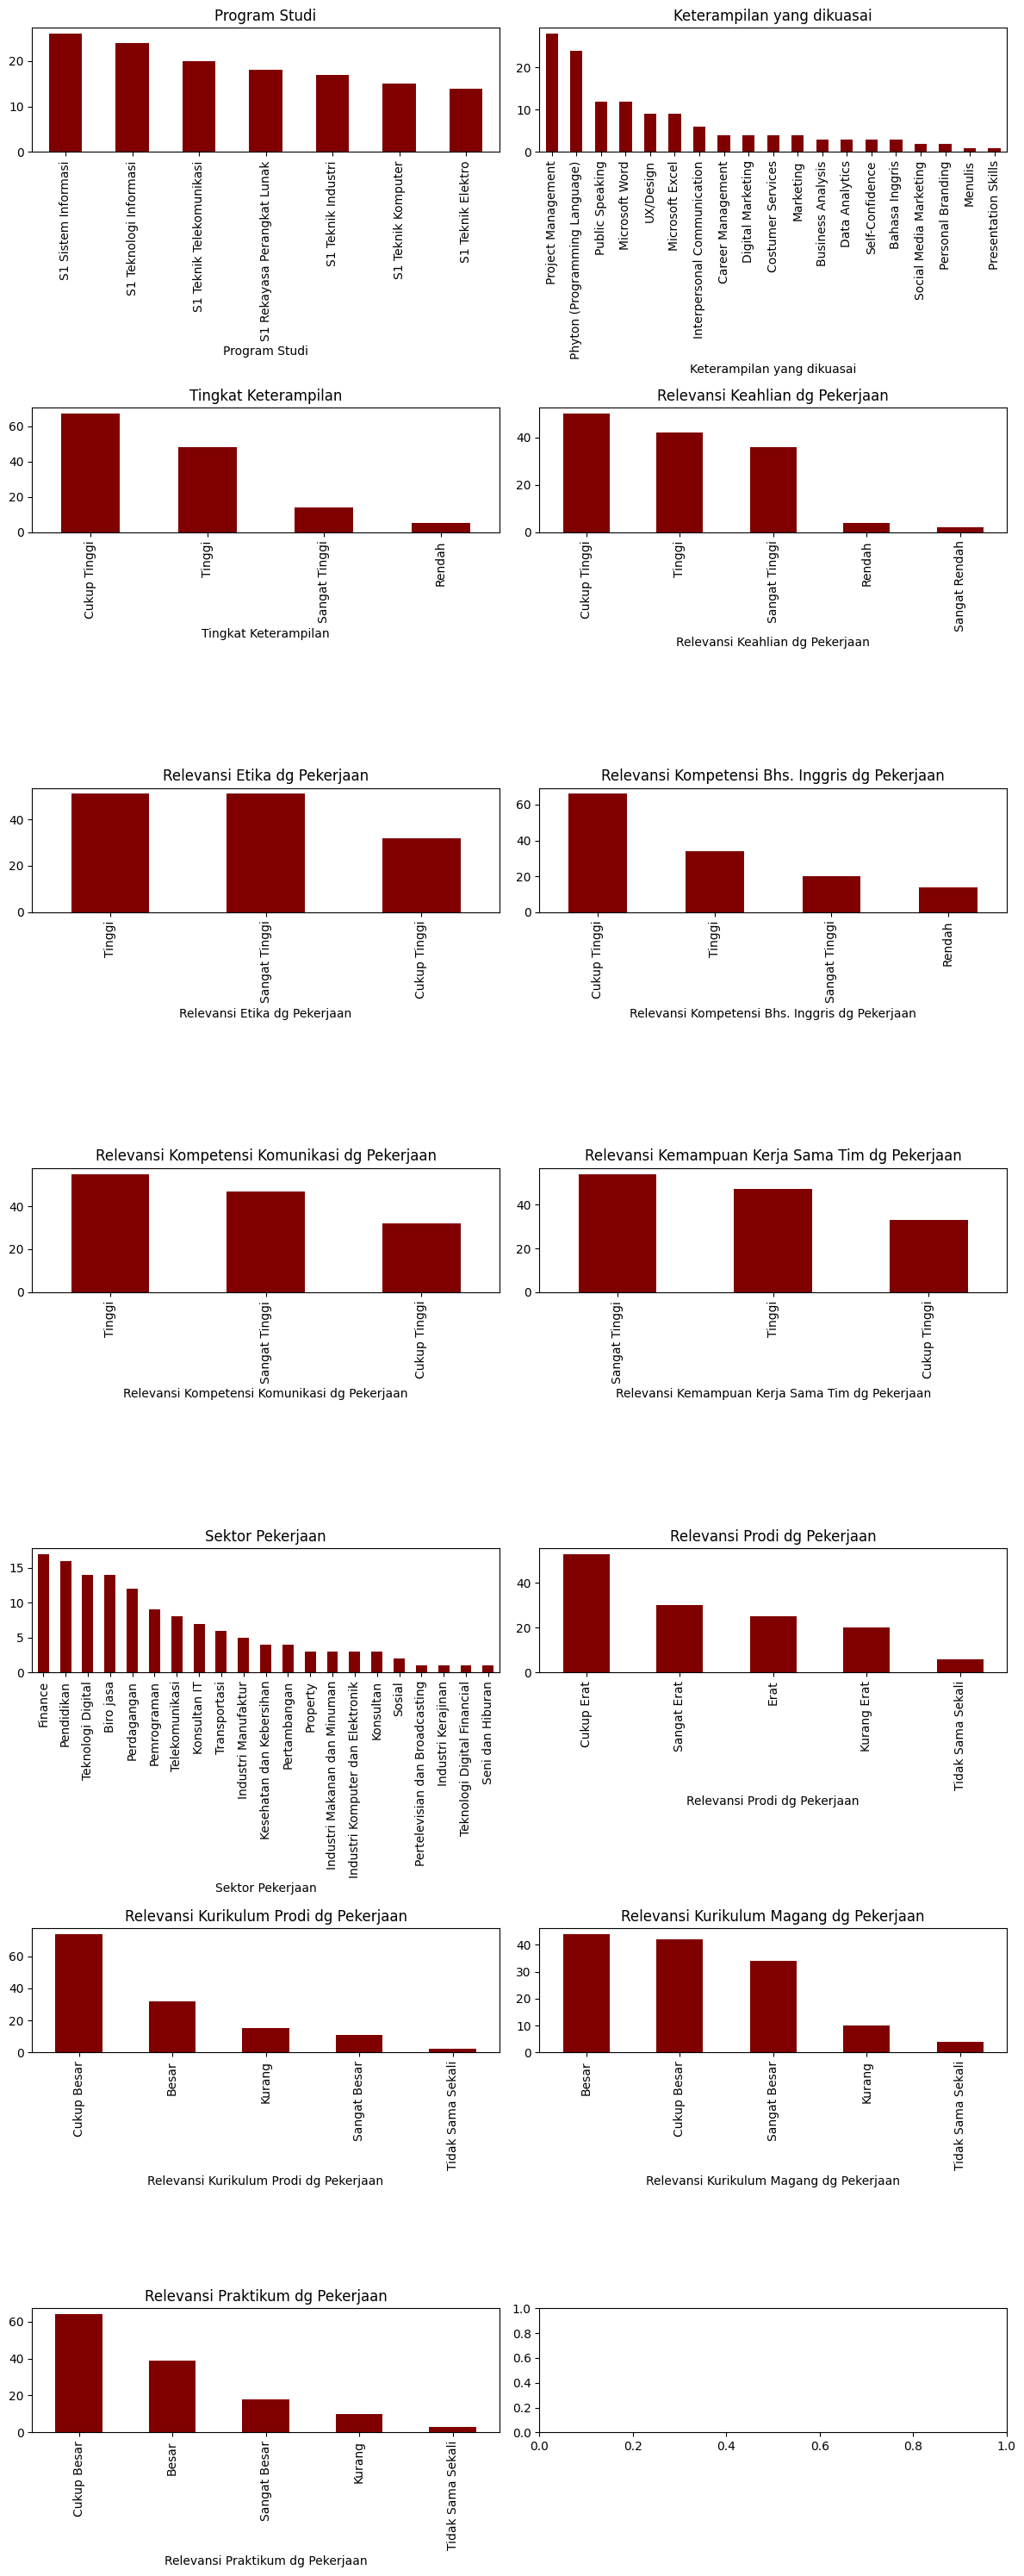

In [6]:
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(12, 30))
axs = axs.flatten()

for i, col in enumerate(df.select_dtypes(exclude=['number']).columns):
    df[col].value_counts().plot(kind='bar', ax=axs[i], color='maroon')
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

<Axes: >

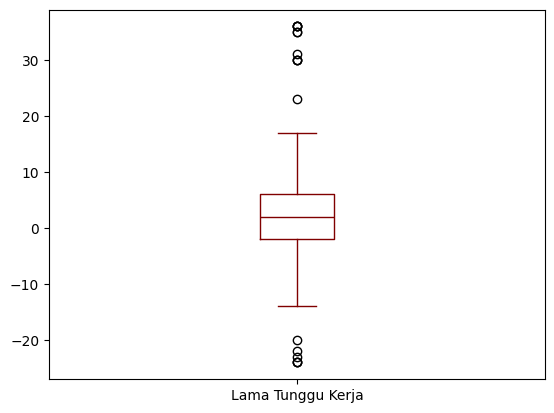

In [7]:
df['Lama Tunggu Kerja'].plot(kind='box', color='maroon')

<Axes: ylabel='Frequency'>

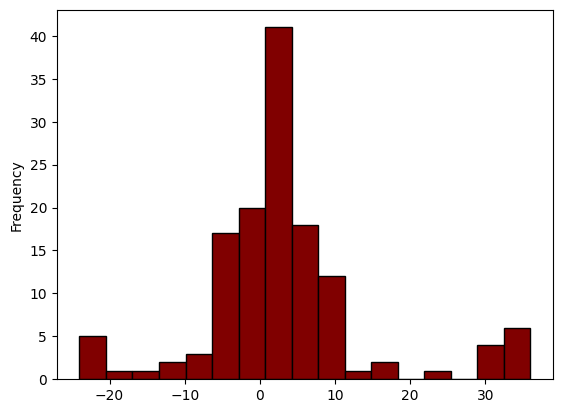

In [8]:
df['Lama Tunggu Kerja'].plot(kind='hist', bins=17, color='maroon', edgecolor='black')

# **PREPARATION**

## Transformation

In [9]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler

In [10]:
df.columns

Index(['Program Studi', 'Keterampilan yang dikuasai', 'Tingkat Keterampilan',
       'Relevansi Keahlian dg Pekerjaan', 'Relevansi Etika dg Pekerjaan',
       'Relevansi Kompetensi Bhs. Inggris dg Pekerjaan',
       'Relevansi Kompetensi Komunikasi dg Pekerjaan',
       'Relevansi Kemampuan Kerja Sama Tim dg Pekerjaan', 'Sektor Pekerjaan',
       'Lama Tunggu Kerja', 'Relevansi Prodi dg Pekerjaan',
       'Relevansi Kurikulum Prodi dg Pekerjaan',
       'Relevansi Kurikulum Magang dg Pekerjaan',
       'Relevansi Praktikum dg Pekerjaan'],
      dtype='object')

Encoding Ordinal karena fitur berisi data kategorik yang memiliki tingkatan

In [11]:
cat_tinggi = df[['Tingkat Keterampilan', 'Relevansi Keahlian dg Pekerjaan', 'Relevansi Etika dg Pekerjaan', 'Relevansi Kompetensi Bhs. Inggris dg Pekerjaan',
                 'Relevansi Kompetensi Komunikasi dg Pekerjaan', 'Relevansi Kemampuan Kerja Sama Tim dg Pekerjaan']]
cat_erat = df[['Relevansi Prodi dg Pekerjaan']]
cat_besar = df[['Relevansi Kurikulum Prodi dg Pekerjaan', 'Relevansi Kurikulum Magang dg Pekerjaan', 'Relevansi Praktikum dg Pekerjaan']]

df_ordinal = pd.concat([cat_tinggi, cat_erat, cat_besar], axis=1)

field_dict = {
  'field_tinggi' : ["Sangat Tinggi", "Tinggi", "Cukup Tinggi", "Rendah", "Sangat Rendah"],
  'field_erat' : ["Sangat Erat", "Erat", "Cukup Erat", "Kurang Erat", "Tidak Sama Sekali"],
  'field_besar' :["Sangat Besar", "Besar", "Cukup Besar", "Kurang", "Tidak Sama Sekali"]
}

kelompok_fitur = {
  'field_tinggi': cat_tinggi.columns,
  'field_erat': cat_erat.columns,
  'field_besar': cat_besar.columns
}

In [13]:
df_encode = df.copy()

for key, kolom in kelompok_fitur.items():
  OE = OrdinalEncoder(categories=[field_dict[key]]*len(kolom))
  df_encode[kolom] = OE.fit_transform(df[kolom])

Label Encoder untuk fitur dengan data kategorik nominal yang kemudian digunakan untuk analisis PCA

In [14]:
cat_label = ['Program Studi', 'Keterampilan yang dikuasai', 'Sektor Pekerjaan']
le = LabelEncoder()
for kolom in cat_label:
  df_encode[kolom] = le.fit_transform(df_encode[kolom])

In [16]:
df_encode.head()

,Program Studi,Keterampilan yang dikuasai,Tingkat Keterampilan,Relevansi Keahlian dg Pekerjaan,Relevansi Etika dg Pekerjaan,Relevansi Kompetensi Bhs. Inggris dg Pekerjaan,Relevansi Kompetensi Komunikasi dg Pekerjaan,Relevansi Kemampuan Kerja Sama Tim dg Pekerjaan,Sektor Pekerjaan,Lama Tunggu Kerja,Relevansi Prodi dg Pekerjaan,Relevansi Kurikulum Prodi dg Pekerjaan,Relevansi Kurikulum Magang dg Pekerjaan,Relevansi Praktikum dg Pekerjaan
0,6,18,2.0,3.0,1.0,2.0,2.0,2.0,10,14,2.0,2.0,2.0,2.0
1,3,2,2.0,1.0,1.0,2.0,1.0,1.0,10,-1,2.0,2.0,1.0,1.0
2,0,12,1.0,0.0,0.0,2.0,0.0,0.0,9,8,0.0,0.0,0.0,1.0
3,0,14,2.0,1.0,1.0,2.0,1.0,1.0,10,-4,1.0,2.0,1.0,2.0
4,0,18,2.0,2.0,1.0,2.0,2.0,2.0,20,-1,2.0,2.0,2.0,2.0


In [56]:
# num_fitur = ['Lama Tunggu Kerja']
df_encode = StandardScaler().fit_transform(df_encode)

In [57]:
df_encode = pd.DataFrame(df_encode, columns=df.columns)
df_encode.head()

,Program Studi,Keterampilan yang dikuasai,Tingkat Keterampilan,Relevansi Keahlian dg Pekerjaan,Relevansi Etika dg Pekerjaan,Relevansi Kompetensi Bhs. Inggris dg Pekerjaan,Relevansi Kompetensi Komunikasi dg Pekerjaan,Relevansi Kemampuan Kerja Sama Tim dg Pekerjaan,Sektor Pekerjaan,Lama Tunggu Kerja,Relevansi Prodi dg Pekerjaan,Relevansi Kurikulum Prodi dg Pekerjaan,Relevansi Kurikulum Magang dg Pekerjaan,Relevansi Praktikum dg Pekerjaan
0,1.404059,1.525263,0.725965,1.940539,0.183159,0.515406,1.463812,1.463502,0.144381,0.951076,0.353200,0.318960,0.686150,0.492677
1,-0.024882,-1.935228,0.725965,-0.226396,0.183159,0.515406,0.147364,0.198281,0.144381,-0.377390,0.353200,0.318960,-0.291979,-0.626284
2,-1.453823,0.227579,-0.644166,-1.309864,-1.108591,0.515406,-1.169085,-1.066940,-0.012912,0.419690,-1.432792,-2.123365,-1.270107,-0.626284
3,-1.453823,0.660140,0.725965,-0.226396,0.183159,0.515406,0.147364,0.198281,0.144381,-0.643084,-0.539796,0.318960,-0.291979,0.492677
4,-1.453823,1.525263,0.725965,0.857071,0.183159,0.515406,1.463812,1.463502,1.717310,-0.377390,0.353200,0.318960,0.686150,0.492677


## PCA

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_encode)

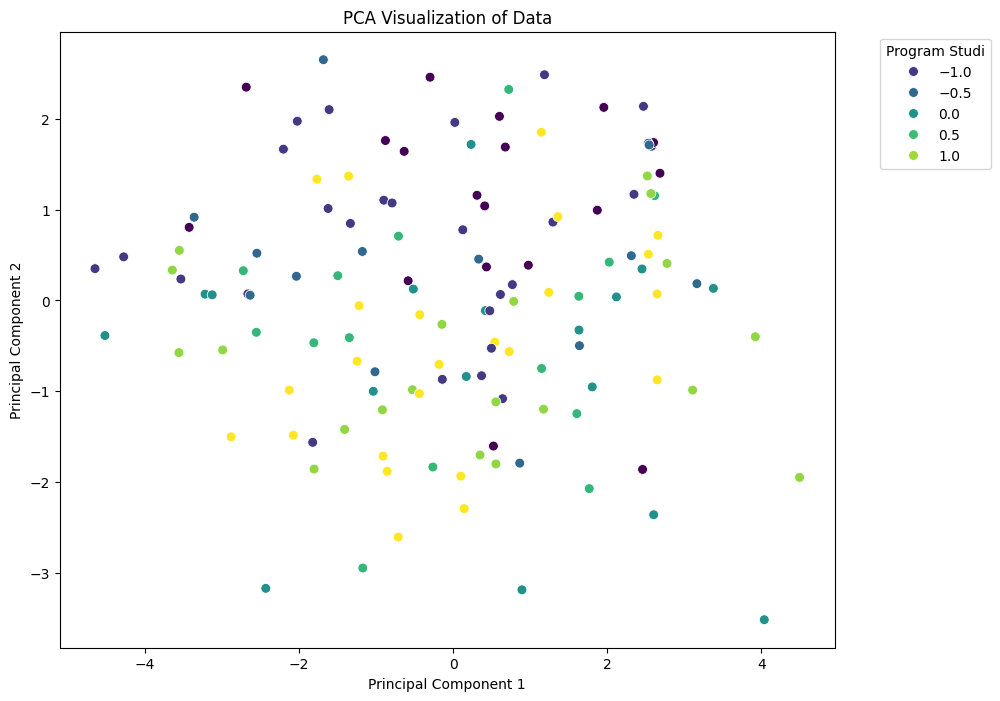

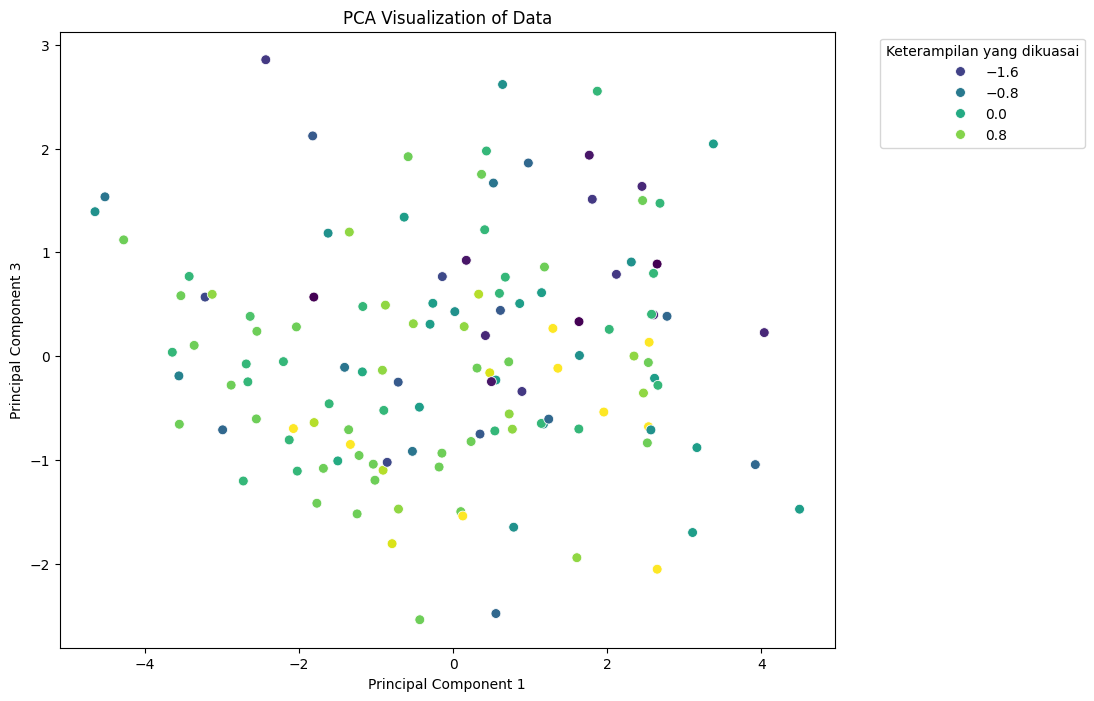

In [60]:
# prompt: buat syntax untuk memvisualisasikan hasil PCA

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_pca is your PCA-transformed data and df_encode contains the original data

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2', 'PC3'])

# Concatenate the PCA components with the original categorical columns for visualization
# You can choose which original columns to include based on your analysis
# Example using 'Program Studi', 'Keterampilan yang dikuasai', 'Sektor Pekerjaan'
pca_df = pd.concat([pca_df, df_encode[['Program Studi', 'Keterampilan yang dikuasai', 'Sektor Pekerjaan']]], axis=1)

# Visualize the PCA results (example with PC1 and PC2)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Program Studi', data=pca_df, palette='viridis', s=50)
plt.title('PCA Visualization of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Program Studi', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position as needed
plt.show()


# You can create similar plots for other combinations of principal components
# or use different categorical variables for the hue argument

# Example with PC1 and PC3
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC3', hue='Keterampilan yang dikuasai', data=pca_df, palette='viridis', s=50)
plt.title('PCA Visualization of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(title='Keterampilan yang dikuasai', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position as needed
plt.show()
